In [49]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose

import seaborn as sns
import plotly.graph_objects as go
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter

import plotly.io as pio

pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [5]:
coins = ['bitcoin', 'ethereum', 'cardano']

In [6]:
bitcoin = pd.read_csv('../data/external/bitcoin.csv', parse_dates=['Date'])
cardano = pd.read_csv('../data/external/cardano.csv', parse_dates=['Date'])
ethereum = pd.read_csv('../data/external/ethereum.csv', parse_dates=['Date'])

df = pd.concat([bitcoin, cardano, ethereum], axis=0)

In [7]:
df.shape

(6525, 10)

In [8]:
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [9]:
df.value_counts(['Symbol'])

Symbol
BTC       2991
ETH       2160
ADA       1374
dtype: int64

In [10]:
df.dtypes

SNo                   int64
Name                 object
Symbol               object
Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Marketcap           float64
dtype: object

## Data Exploration

### Bitcoin

In [11]:
print(
    f"Min Date: {df[df.Symbol == 'BTC'].Date.min()}, Max Date: {df[df.Symbol == 'BTC'].Date.max()}"
)


Min Date: 2013-04-29 23:59:59, Max Date: 2021-07-06 23:59:59


In [12]:
df[df.Symbol == 'BTC'].describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


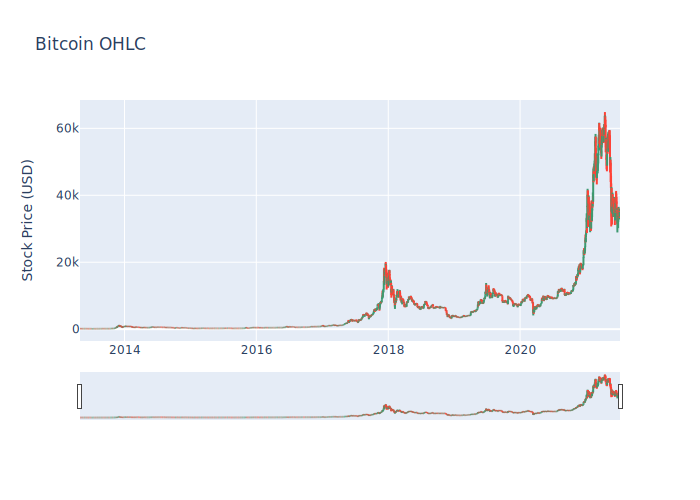

In [13]:
fig = go.Figure(data=go.Ohlc(x=df[df.Symbol == 'BTC']['Date'],
                             open=df[df.Symbol == 'BTC']['Open'],
                             high=df[df.Symbol == 'BTC']['High'],
                             low=df[df.Symbol == 'BTC']['Low'],
                             close=df[df.Symbol == 'BTC']['Close']))
fig.update_layout(title='Bitcoin OHLC', yaxis_title='Stock Price (USD)')
fig.show(renderer="svg")

## Cardano

In [14]:
print(
    f"Min Date: {df[df.Symbol == 'ADA'].Date.min()}, Max Date: {df[df.Symbol == 'ADA'].Date.max()}"
)


Min Date: 2017-10-02 23:59:59, Max Date: 2021-07-06 23:59:59


In [15]:
df[df.Symbol == 'ADA'].describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1.374000e+03,1.374000e+03
mean,687.500000,0.269807,0.239710,0.255287,0.256313,8.934183e+08,7.603454e+09
std,396.783946,0.433523,0.380928,0.408456,0.409691,2.107653e+09,1.303878e+10
min,1.000000,0.021050,0.017620,0.018414,0.018539,1.739460e+06,4.806646e+08
25%,344.250000,0.047565,0.044601,0.045898,0.045947,5.014830e+07,1.191263e+09
50%,687.500000,0.090274,0.083164,0.086867,0.087002,1.186742e+08,2.270889e+09
75%,1030.750000,0.194519,0.172442,0.181374,0.183379,4.875977e+08,5.174547e+09
max,1374.000000,2.461766,2.013285,2.300190,2.309113,1.914198e+10,7.377224e+10


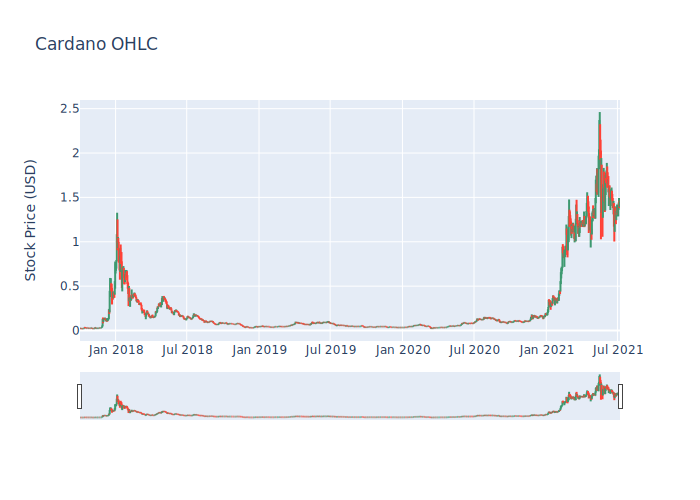

In [16]:
fig = go.Figure(data=go.Ohlc(x=df[df.Symbol == 'ADA']['Date'],
                             open=df[df.Symbol == 'ADA']['Open'],
                             high=df[df.Symbol == 'ADA']['High'],
                             low=df[df.Symbol == 'ADA']['Low'],
                             close=df[df.Symbol == 'ADA']['Close']))
fig.update_layout(title='Cardano OHLC', yaxis_title='Stock Price (USD)')
fig.show(renderer="svg")

## Ethereum

In [17]:
print(
    f"Min Date: {df[df.Symbol == 'ETH'].Date.min()}, Max Date: {df[df.Symbol == 'ETH'].Date.max()}"
)


Min Date: 2015-08-08 23:59:59, Max Date: 2021-07-06 23:59:59


In [18]:
df[df.Symbol == 'ETH'].describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2.160000e+03,2.160000e+03
mean,1080.500000,398.258568,365.592589,382.879899,383.910691,7.057058e+09,4.172084e+10
std,623.682612,628.082281,566.611523,599.719862,601.078766,1.064526e+10,6.909184e+10
min,1.000000,0.482988,0.420897,0.431589,0.434829,1.021280e+05,3.221363e+07
25%,540.750000,14.265225,13.190950,13.757600,13.819200,3.825102e+07,1.135576e+09
50%,1080.500000,205.124631,193.302715,198.425096,198.643691,2.148880e+09,2.070063e+10
75%,1620.250000,396.494561,375.146804,386.264935,386.435272,9.629136e+09,4.231010e+10
max,2160.000000,4362.350542,3785.848603,4174.635873,4168.701049,8.448291e+10,4.828819e+11


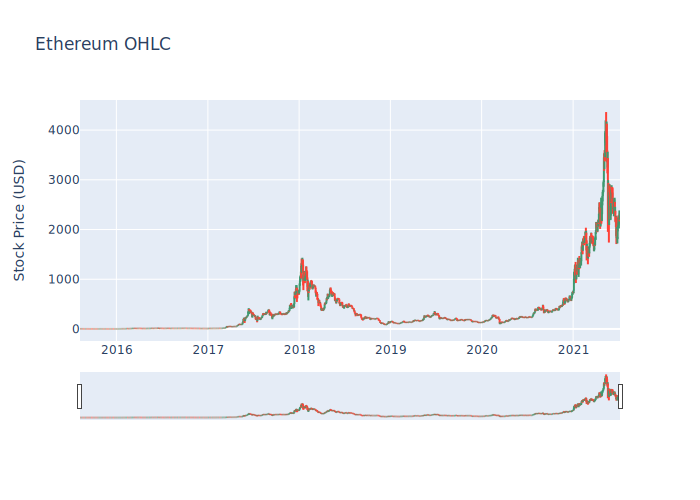

In [19]:
fig = go.Figure(data=go.Ohlc(x=df[df.Symbol == 'ETH']['Date'],
                             open=df[df.Symbol == 'ETH']['Open'],
                             high=df[df.Symbol == 'ETH']['High'],
                             low=df[df.Symbol == 'ETH']['Low'],
                             close=df[df.Symbol == 'ETH']['Close']))
fig.update_layout(title='Ethereum OHLC', yaxis_title='Stock Price (USD)')
fig.show(renderer="svg")

### Seasonality




<built-in method title of str object at 0x7f128485fbf0>


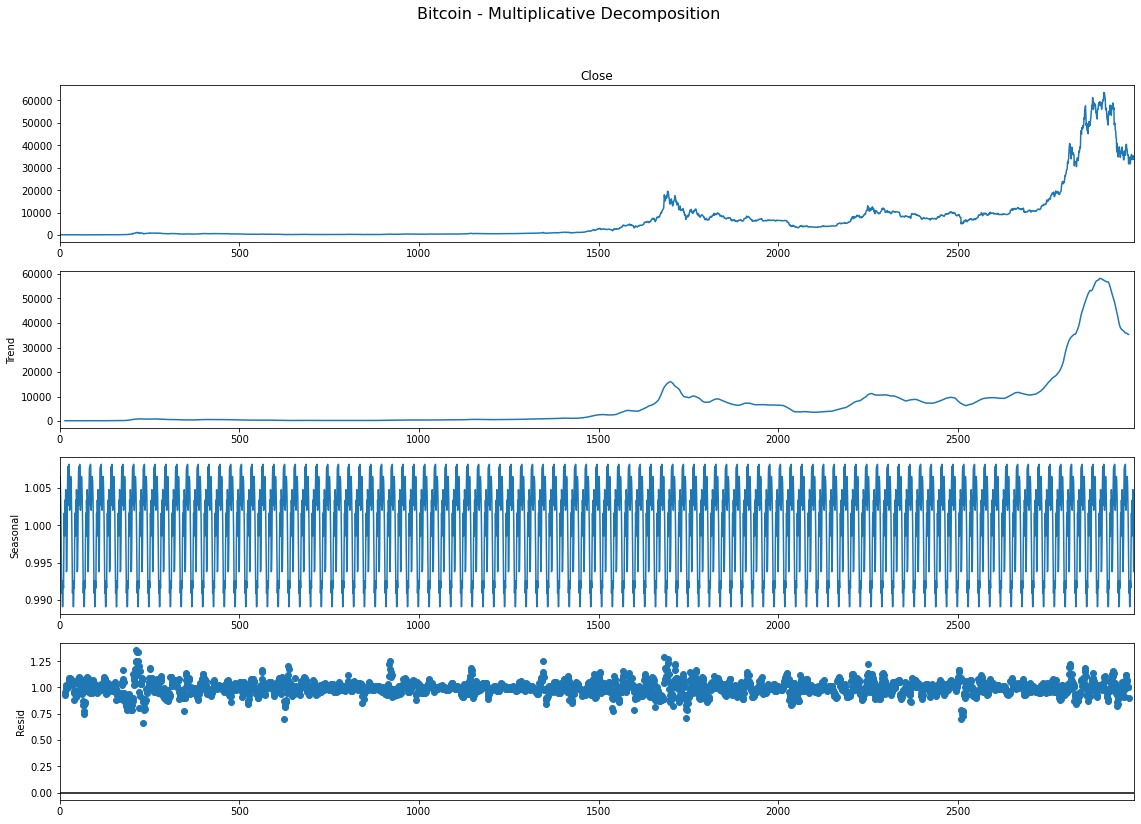

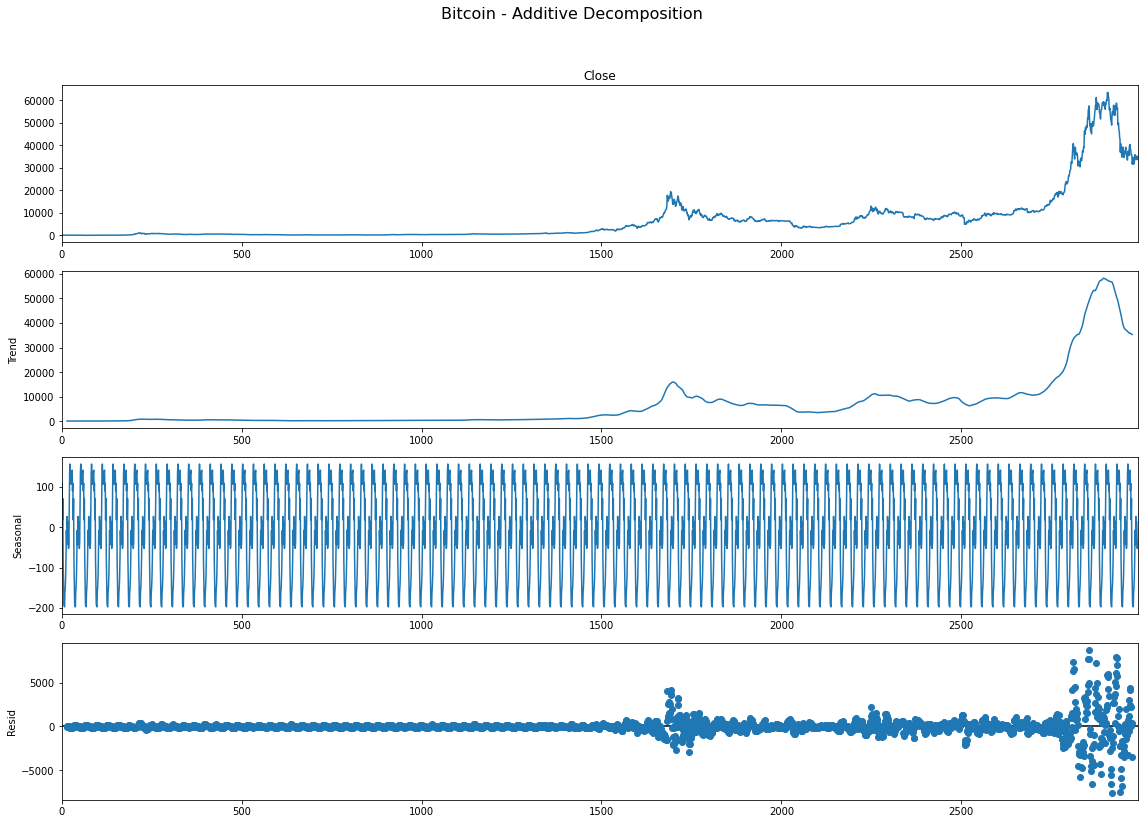




<built-in method title of str object at 0x7f128485f470>


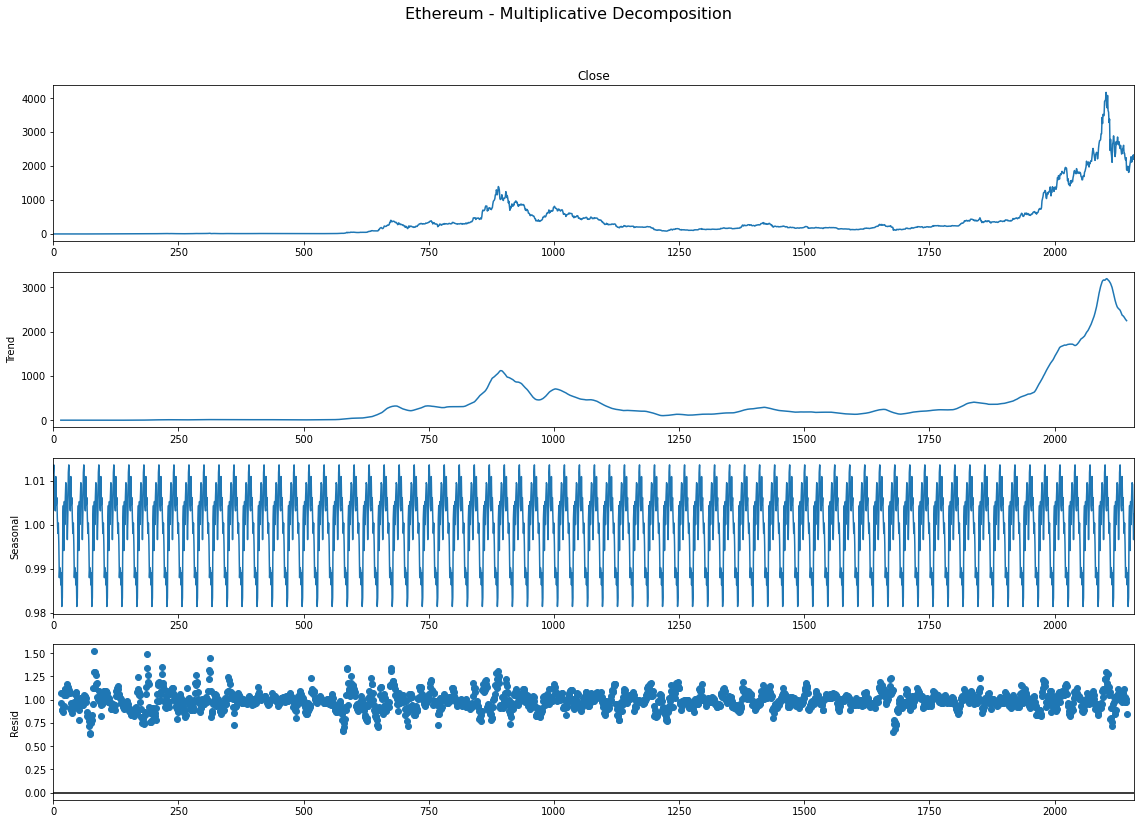

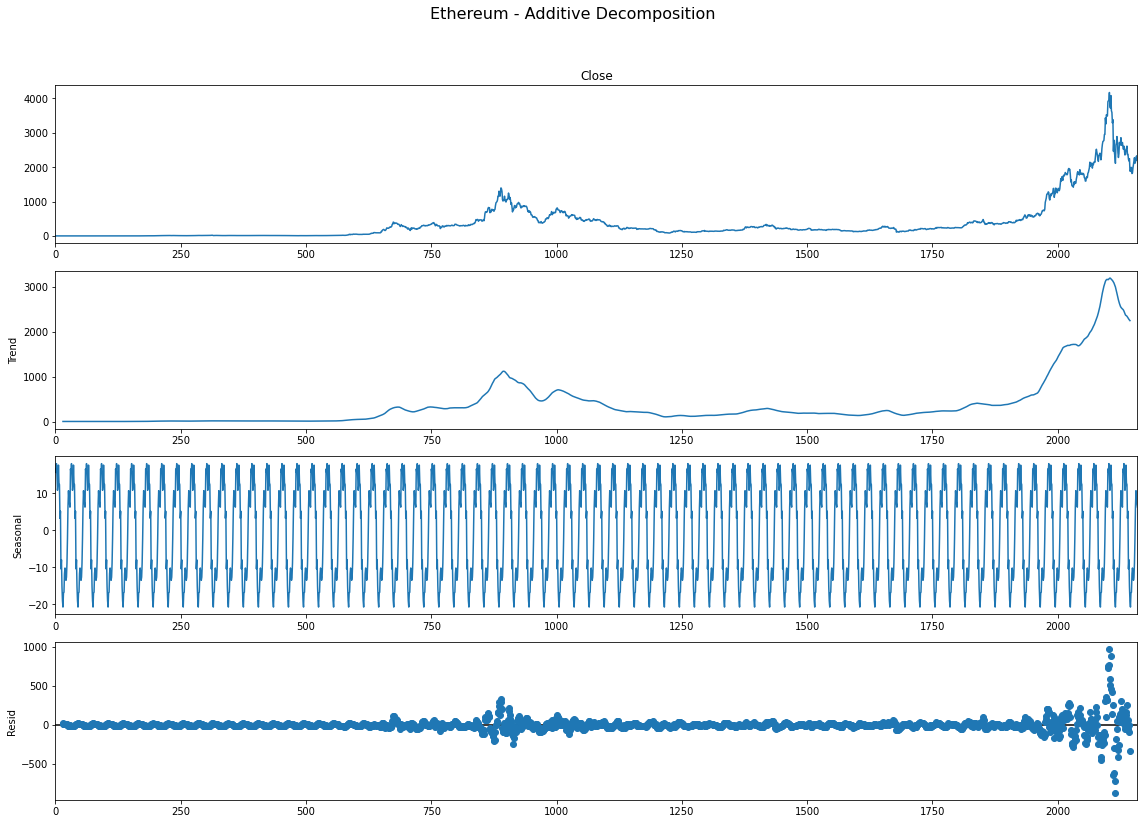




<built-in method title of str object at 0x7f128485fe70>


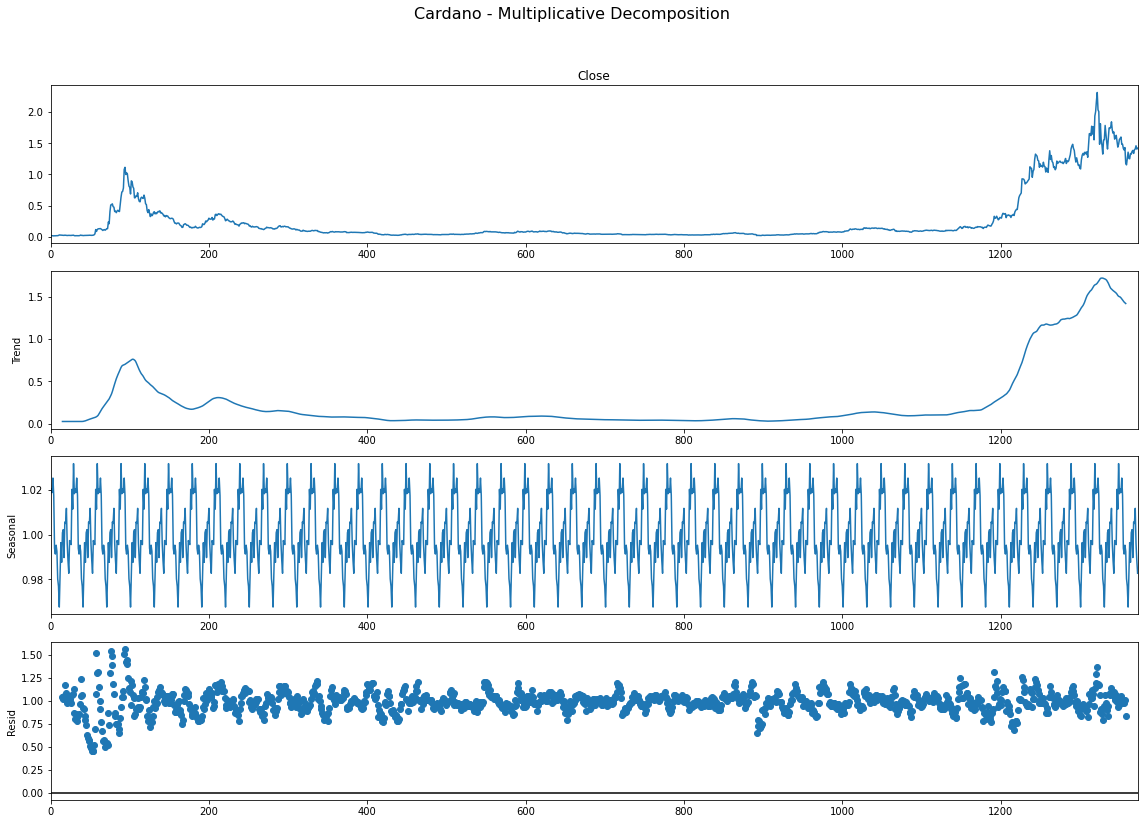

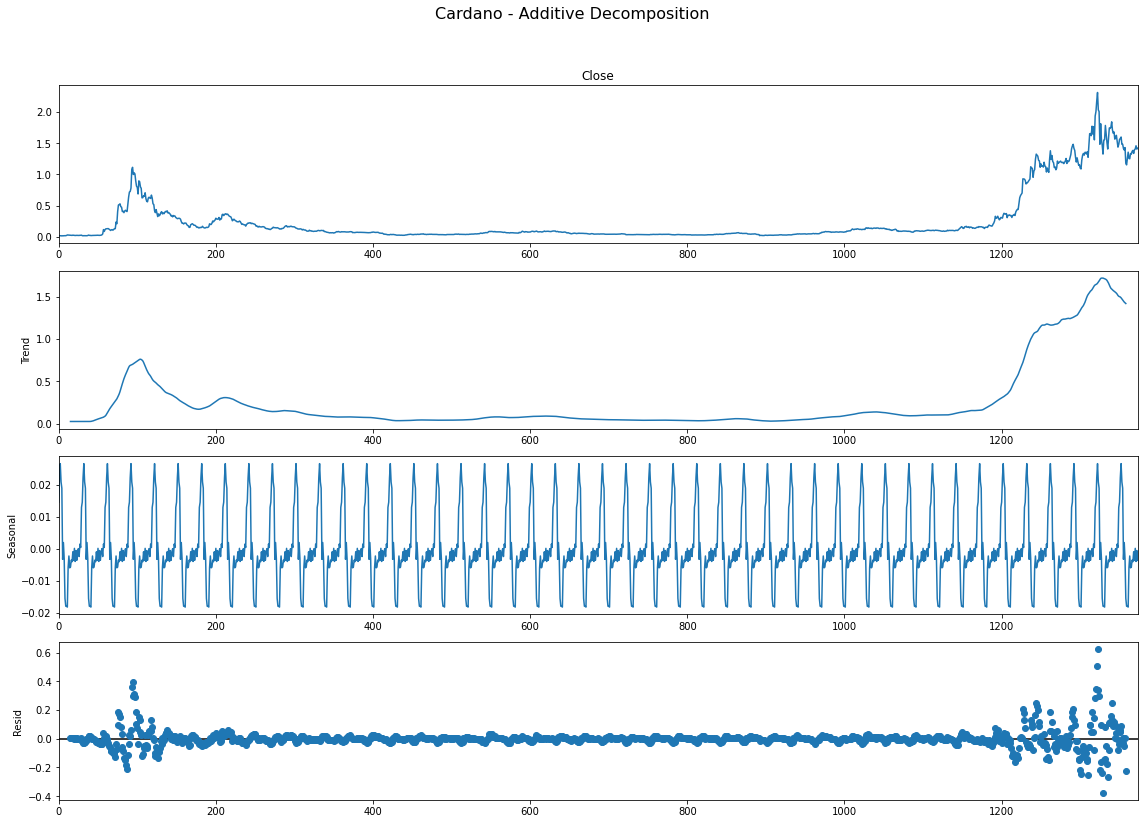

In [20]:
def plot_decompose(df: pd.DataFrame, coin: str, col):
    multiplicative_decomposition = seasonal_decompose(df[col],
                                                      model='multiplicative',
                                                      period=30)

    additive_decomposition = seasonal_decompose(df[col],
                                                model='additive',
                                                period=30)

    # Plot
    plt.rcParams.update({'figure.figsize': (16, 12)})
    multiplicative_decomposition.plot().suptitle(
        f'{coin.title()} - Multiplicative Decomposition', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    additive_decomposition.plot().suptitle(
        f'{coin.title()} - Additive Decomposition', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    plt.show()


for col in coins:
    print(f'\n\n\n{col.title}')
    plot_decompose(df[df.Name == col.title()], col, 'Close')


In [21]:
df.columns

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')

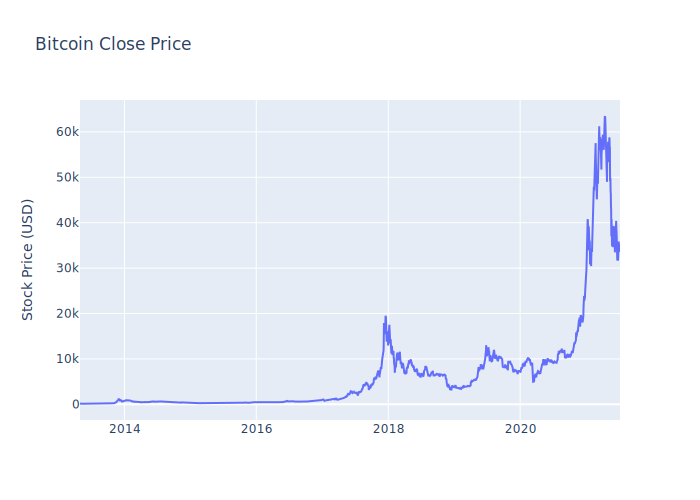

In [22]:
# create a plot to evaluate close price seasonality
fig = go.Figure(data=go.Scatter(x=df[df.Symbol == 'BTC']['Date'],
                                y=df[df.Symbol == 'BTC']['Close']))
fig.update_layout(title='Bitcoin Close Price', yaxis_title='Stock Price (USD)')
fig.show(renderer="svg")


## Train Test Split

In [23]:
processed_df = pd.read_csv('../data/processed/dataset.csv')
processed_df.head()

,date,bitcoin_sno,bitcoin_high,bitcoin_low,bitcoin_open,bitcoin_close,bitcoin_volume,bitcoin_marketcap,ethereum_sno,ethereum_high,...,ethereum_close,ethereum_volume,ethereum_marketcap,cardano_sno,cardano_high,cardano_low,cardano_open,cardano_close,cardano_volume,cardano_marketcap
0,2013-04-29 23:59:59,1,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-04-30 23:59:59,2,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-05-01 23:59:59,3,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-05-02 23:59:59,4,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-05-03 23:59:59,5,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
date_threshold = '2021-04-01'
train = processed_df[(processed_df.date < date_threshold) & (processed_df.date >= '2017-10-02')]
test = processed_df[(processed_df.date >= date_threshold) & (processed_df.date >= '2017-10-02')]
print(
    f'Train: {train.shape}, Test: {test.shape}, Proportion: {train.shape[0] / (train.shape[0] + test.shape[0]):.2%}'
)

Train: (1277, 22), Test: (97, 22), Proportion: 92.94%


In [78]:
train.isna().sum()

date                  0
bitcoin_sno           0
bitcoin_high          0
bitcoin_low           0
bitcoin_open          0
bitcoin_close         0
bitcoin_volume        0
bitcoin_marketcap     0
ethereum_sno          0
ethereum_high         0
ethereum_low          0
ethereum_open         0
ethereum_close        0
ethereum_volume       0
ethereum_marketcap    0
cardano_sno           0
cardano_high          0
cardano_low           0
cardano_open          0
cardano_close         0
cardano_volume        0
cardano_marketcap     0
dtype: int64

## Feature Engineering

TODO: Test min max scaler over windows

### Columns Selection

In [79]:
class ColumnDropTransformer():

    def __init__(self, columns):
        self.columns = columns

    def transform(self, X, y=None):
        return X.drop(self.columns, axis=1)

    def fit(self, X, y=None):
        return self


In [80]:
normalize_cols = []
for coin in coins:
    for col in ['open', 'high', 'low', 'close', 'volume', 'marketcap']:
        normalize_cols.append(f'{coin}_{col}')

drop_cols = []
for coin in coins:
    for col in ['sno']:
        drop_cols.append(f'{coin}_{col}')

In [81]:
minmax_transformer = Pipeline(steps=[('minmax', MinMaxScaler())])

pipeline = Pipeline([
    ("column_dropper", ColumnDropTransformer(drop_cols)),
    ('normalization',
     ColumnTransformer(remainder='passthrough',
                       transformers=[('norm', minmax_transformer, normalize_cols)],verbose_feature_names_out=True))
])

In [82]:
train = pipeline.fit_transform(train)

In [29]:
feature_names = list(pipeline["normalization"].get_feature_names_out())

In [30]:
train[0]

array([0.01999720780247844, 0.02045682453881873, 0.021139457784814124,
       0.020214316579986027, 0.0014991730806703865, 0.015465417144012297,
       0.11633588804620618, 0.11152411276292093, 0.11674150089811837,
       0.11363700588402938, 0.0014169339511731199, 0.09014913350584369,
       0.004553743130024792, 0.006208699780514087, 0.0019230080713730537,
       0.005435270924753136, 0.0029206445468598873, 0.0034025566225197607,
       '2017-10-02 23:59:59'], dtype=object)

### Coins Correlation

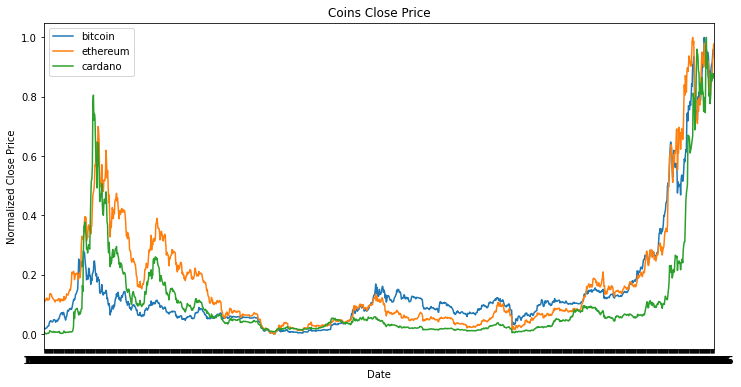

In [31]:
fig, ax = plt.subplots(figsize=(12, 6))

for coin in coins:
    ax.plot(train[:, -1],
            train[:, feature_names.index(f'norm__{coin}_close')],
            label=coin)
ax.set(xlabel="Date",
       ylabel="Normalized Close Price",
       title="Coins Close Price",
       xlim=[min(train[:, -1]), max(train[:, -1])])
ax.legend(loc='best')

date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
plt.show()

### Correlation test

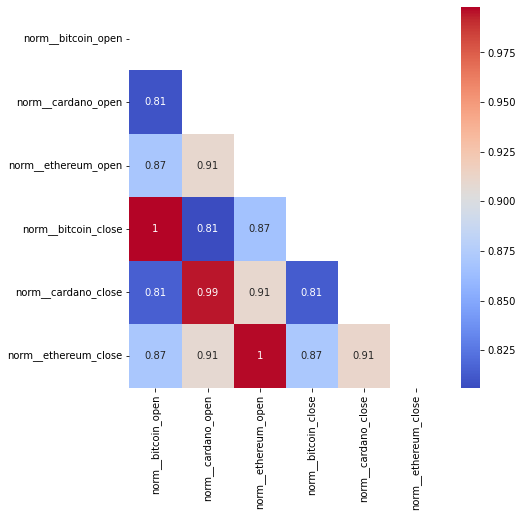

In [48]:
corr_cols = [
    'norm__bitcoin_open', 'norm__cardano_open', 'norm__ethereum_open',
    'norm__bitcoin_close', 'norm__cardano_close', 'norm__ethereum_close'
]
corr_cols_index = [feature_names.index(col) for col in corr_cols]
corr_dataframe = pd.DataFrame(train[:,corr_cols_index], columns=corr_cols,dtype=np.float64)
mask = np.triu(corr_dataframe.corr())
plt.figure(figsize=(7, 7))
sns.heatmap(corr_dataframe.corr(),
            mask=mask,
            xticklabels=True,
            yticklabels=True,
            cmap='coolwarm',
            annot=True)
plt.show()

### Stationary Test

In [84]:
response_string = "adf: {0:.4f}, p-value: {1:.4f}, usedlag: {2}, nobs: {3}, critical_values: {4}"

results_cols = ['adf', 'pvalue', 'usedlag', 'nobs', 'critical values']

for col in corr_cols:
    col_index = feature_names.index(col)
    adf_results = adfuller(train[:, col_index])
    print(f"\n---------\n{col}\n{response_string.format(*adf_results)}")


---------
norm__bitcoin_open
adf: 3.8634, p-value: 1.0000, usedlag: 20, nobs: 1256, critical_values: {'1%': -3.4355671297788666, '5%': -2.8638438984080117, '10%': -2.5679966213893057}

---------
norm__cardano_open
adf: -1.1591, p-value: 0.6909, usedlag: 22, nobs: 1254, critical_values: {'1%': -3.4355754676859886, '5%': -2.8638475772391665, '10%': -2.5679985805677017}

---------
norm__ethereum_open
adf: 0.6970, p-value: 0.9898, usedlag: 22, nobs: 1254, critical_values: {'1%': -3.4355754676859886, '5%': -2.8638475772391665, '10%': -2.5679985805677017}

---------
norm__bitcoin_close
adf: 3.8429, p-value: 1.0000, usedlag: 20, nobs: 1256, critical_values: {'1%': -3.4355671297788666, '5%': -2.8638438984080117, '10%': -2.5679966213893057}

---------
norm__cardano_close
adf: -0.9426, p-value: 0.7736, usedlag: 23, nobs: 1253, critical_values: {'1%': -3.4355796466416777, '5%': -2.863849421064024, '10%': -2.5679995625056926}

---------
norm__ethereum_close
adf: 1.0059, p-value: 0.9943, usedlag: 